# Module 20: Unsupervised Learning Challenge

In [1]:
# Importing Dependencies

import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Myopia Diagnostic Dataset

**Dataset Characteristics:**

* _Number of Instances:_ 618

* _Number of Attributes:_ 16 numeric, predictive attributes and the class.

* _Attribute Information:_
        
  * ID: Study ID
  * AGE: Age at first visit (years)
  * SPHEQ: Spherical Equivalent Refraction (diopter)
  * AL: Axial Length (mm)
  * ACD: Anterior Chamber Depth (mm)
  * LT: Lens Thickness (mm)
  * VCD: Vitreous Chamber Depth (mm)
  * SPORTHR: Time spent engaging in sports/outdoor activities (hours per week)
  * READHR:Time spent reading for pleasure (hours per week)
  * COMPHR:Time spent playing video/computer games or working on the computer (hours per week)
  * STUDYHR:Time spent reading or studying for school assignments (hours per week)
  * TVHR: Time spent watching television (hours per week)
  * DIOPTERHR: Composite of near-work activities (hours per week)
  * MOMMY: Was the subject’s mother myopic? (No/Yes)
  * DADMY: Was the subject’s father myopic? (No/Yes)
  * MYOPIC: Myopia within the first five years of follow up (No/Yes)

**Data source:** The dataset used in this activity is a subset of data from Orinda Longitudinal Study of Myopia conducted by the US National Eye Institute. <https://clinicaltrials.gov/ct2/show/NCT00000169>

## Part 1: Prepare the Data

In [2]:
# Loading data
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Identify all the possible values in the MYOPIC column
myopia_df['MYOPIC'].unique()

array([1, 0], dtype=int64)

In [4]:
# But since we don't actually need the MYOPIC column for unsupervised learning...
# Drop the MYOPIC column in new dataframe
new_myopia_df = myopia_df.drop(["MYOPIC"], axis='columns')

# Set the MYOPIC column equal to the labels
labels = myopia_df['MYOPIC']

new_myopia_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [5]:
# Standardize dataset with StandarScaler

X = StandardScaler().fit_transform(new_myopia_df)
print(X[0:3])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]]


## Part 2: Apply Dimensionality Reduction

### Perform dimensionality reduction with PCA

In [6]:
# Applying PCA to preserve 90% of the explained variance in dimensionality reduction

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get 90% principal components for the iris data.
myopia_pca = pca.fit_transform(X)

In [7]:
myopia_pca

array([[ 5.35502713e-01,  1.14500427e+00, -1.38501894e+00, ...,
        -1.92299652e+00,  2.67528503e-02,  1.78143856e-01],
       [-6.24705593e-01, -1.57578643e+00, -7.94253057e-01, ...,
         2.85332291e-01,  6.89682613e-01, -5.57030831e-01],
       [-9.33479366e-01, -7.17076224e-01,  8.20149929e-01, ...,
        -3.08170124e-02, -4.31499076e-01,  1.33358217e-02],
       ...,
       [-8.90082017e-01, -2.30800520e+00,  2.68101833e-01, ...,
        -4.89876908e-01,  1.82269069e+00,  8.17765449e-02],
       [-1.12399979e+00,  4.51889784e-01,  1.65865634e-03, ...,
         2.39685015e-01, -1.59282241e+00, -1.01458084e+00],
       [-6.91533913e-01, -7.37046188e-01, -1.05290000e+00, ...,
        -2.73804495e-01,  9.46160724e-01,  4.95797353e-01]])

In [8]:
# Fetch the explained variance - checking the variability
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

([<matplotlib.axis.XTick at 0x1ec52121070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

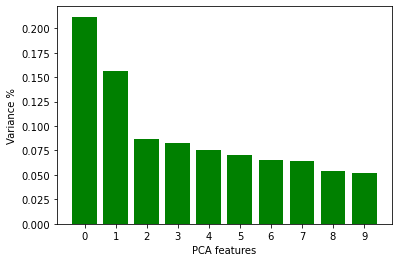

In [9]:
#Plot the explained variance

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('Variance %')
plt.xticks(features)

**How did the number of the features change?**
PCA is used to prevent the problem of overfitting by reducing the number of input features. Initially we had 14 features and it was reduced to 10. The chart above shows that  the first 3 features explain majority of the variance in the data.

In [10]:
# Transform PCA data to a DataFrame
df_myopia_pca =pd.DataFrame(myopia_pca)
df_myopia_pca.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336


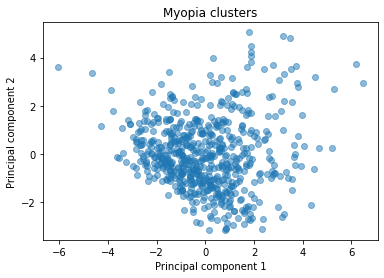

In [11]:
# Visualize the clusters for the first two values
plt.scatter(x=df_myopia_pca[0], y=df_myopia_pca[1], alpha=0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

### Perform dimensionality reduction with t-SNE

In [12]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=100)

In [13]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

In [14]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

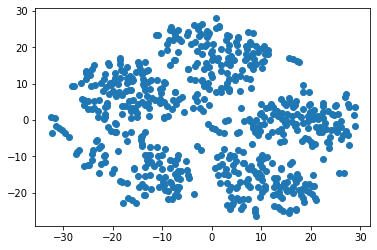

In [15]:
# Visualize the clusters (default)
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

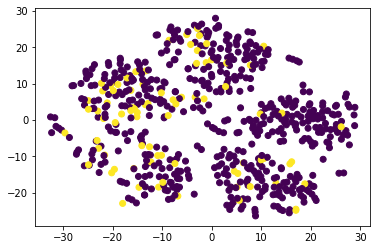

In [16]:
# Visualize the clusters with colors
plt.scatter(tsne_features[:,0], tsne_features[:,1],c=labels)
plt.show()

Based on the scatter plot above, visually, there may be about 5 distinct clusters.

## Part 3: Perform a Cluster Analysis with K-means

In [17]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    myopia_model = KMeans(n_clusters=i, random_state=0)
    myopia_model.fit(df_myopia_pca)
    inertia.append(myopia_model.inertia_)

# Create the Elbow Curve using hvPlot
myopia_elbow_data = {"k": k, "inertia": inertia}
myopia_df_elbow = pd.DataFrame(myopia_elbow_data)
myopia_df_elbow.head()

C:\bootcamp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


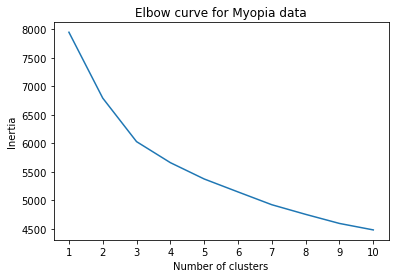

In [18]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(myopia_df_elbow['k'], myopia_df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia data')
plt.show()

Based on the plot above, the elbow of the plot is at k= 3.

### Reusing a function from the course "get_clusters(k,data)"

Function called get_clusters(k, data) that finds the k clusters using K-Means on data. The function will return a DataFrame copy of Data that should include a new column containing the clusters found.
    
    * Since based on the plot above, I will be passing k = 3 to this function.

In [19]:
#Function that finds the k clusters using K-Means on data

def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [20]:
#Calling the get_clusters() funcitons

myopia_clusters = get_clusters(3, myopia_df)
myopia_clusters

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC,class
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1,2
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1,2
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1,2
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0,2


### Visualization with K=3

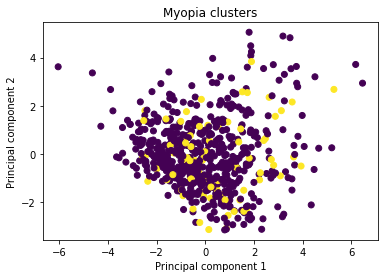

In [21]:
# Visualize the clusters for the first two values
plt.scatter(x=df_myopia_pca[0], y=df_myopia_pca[1], c=labels)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

## Part 4: Make a Recommendation

#### Observations:
1. After applying Dimensionality Reduction with PCA, it appears the first 3 features would explain the variance in the dataset
2. When the dataset was further reducted with t-SNE, it appeared to 5 distinct clusters in the scatter plot.
3. With the K-Means chart, it can  be seen that after the third cluster the change in the value of ineratia is no longer significant, k=3.

#### Recommendation:
Based on the assessment conducted, the data appears to have distinct groups of patients that would be better to analyze separately which is better seen with the t-SNE and K-Means chart.